In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, interpolate
from scipy.ndimage import gaussian_filter1d
import seaborn as sns
from ADM import ADM
from scipy.fft import fft, fftfreq


sns.set()

In [3]:
def reconstruct_from_spikes(spikes, length, spike_value):
    reconstructed_signal = np.zeros(length)
    spikes_sampling_rate_indices = (spikes * 64).astype(int)
    reconstructed_signal[spikes_sampling_rate_indices] = spike_value
    reconstructed_signal = gaussian_filter1d(reconstructed_signal, 10)
    return reconstructed_signal

In [32]:
def loop_inplace_sum(arrlist):
    # assumes len(arrlist) > 0
    sum = arrlist[0].copy()
    for a in arrlist[1:]:
        sum += a
    return sum

input frequency = 1.0 Hz


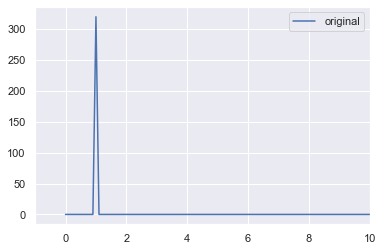

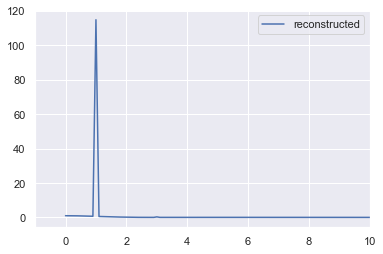

input frequency = 1.4736842105263157 Hz


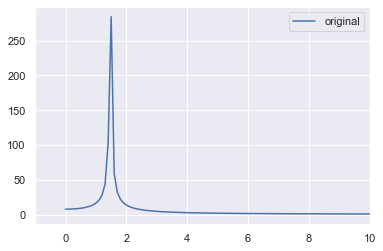

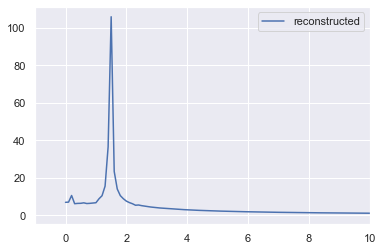

input frequency = 1.9473684210526314 Hz


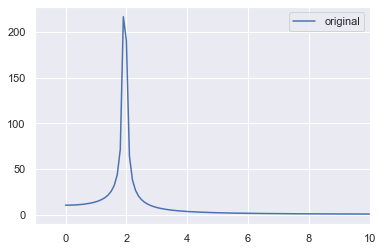

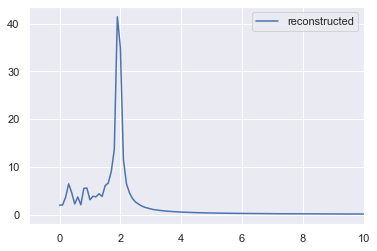

input frequency = 2.4210526315789473 Hz


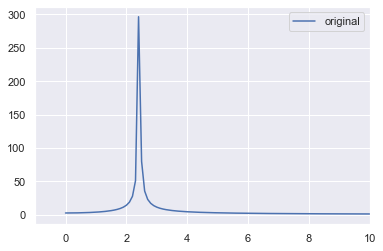

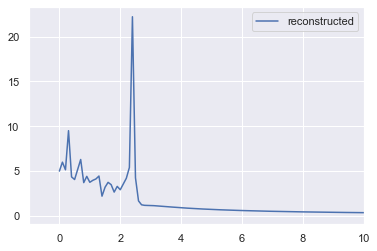

input frequency = 2.894736842105263 Hz


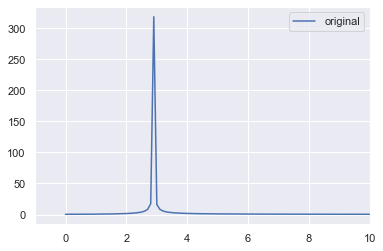

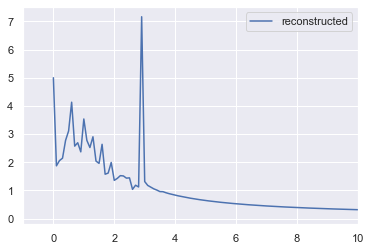

input frequency = 3.3684210526315788 Hz


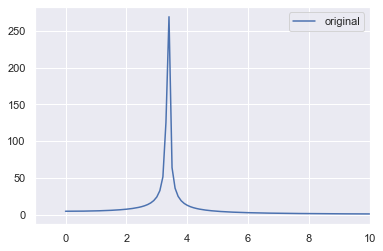

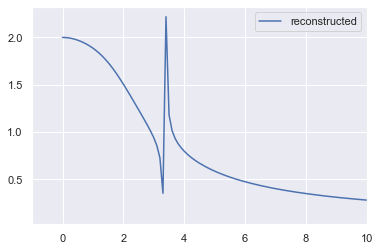

input frequency = 3.8421052631578947 Hz


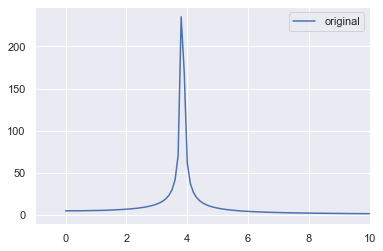

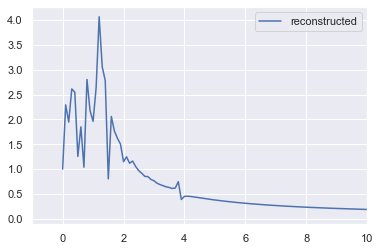

input frequency = 4.315789473684211 Hz


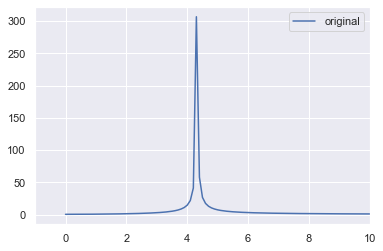

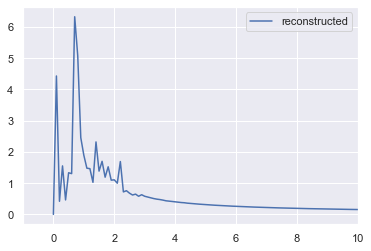

input frequency = 4.789473684210526 Hz


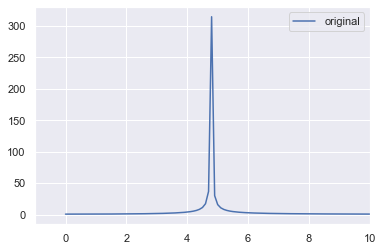

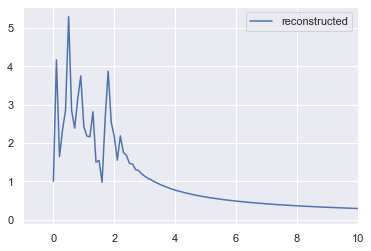

input frequency = 5.263157894736842 Hz


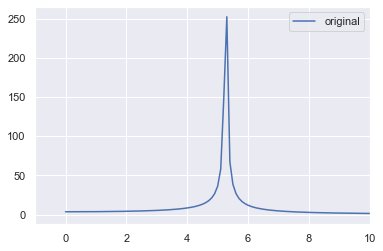

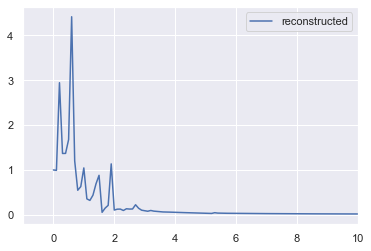

input frequency = 5.7368421052631575 Hz


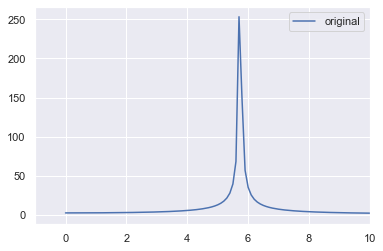

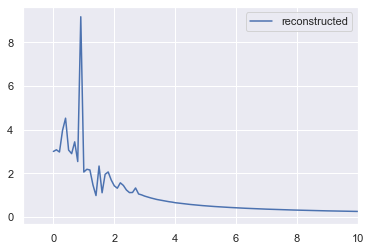

input frequency = 6.2105263157894735 Hz


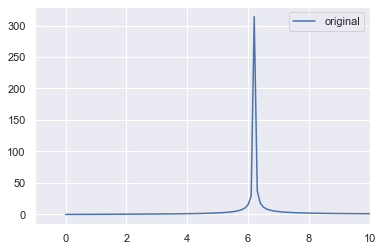

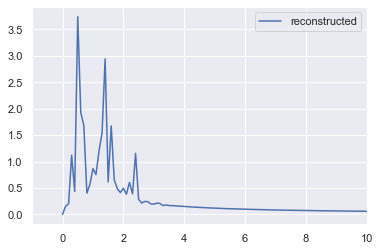

input frequency = 6.684210526315789 Hz


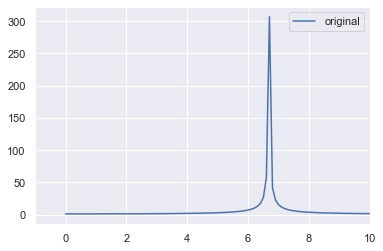

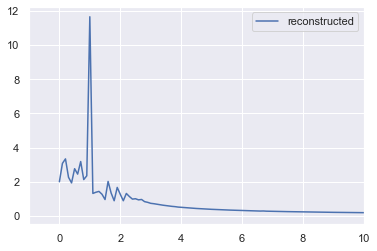

input frequency = 7.157894736842105 Hz


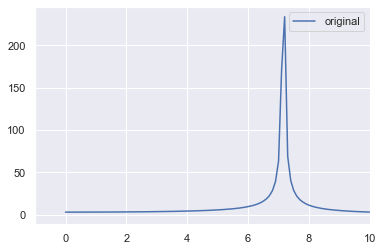

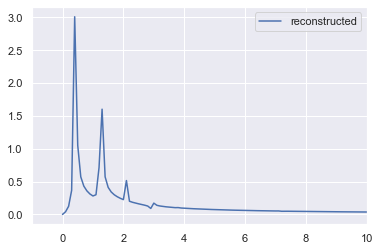

input frequency = 7.63157894736842 Hz


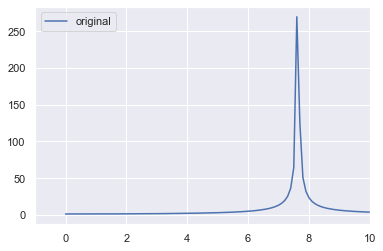

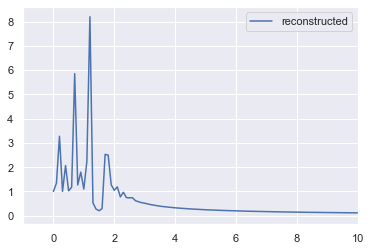

input frequency = 8.105263157894736 Hz


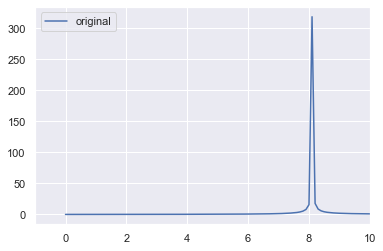

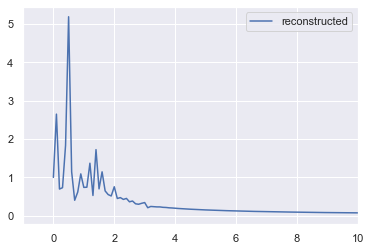

input frequency = 8.578947368421051 Hz


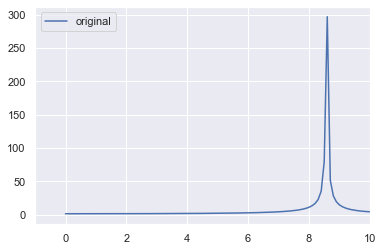

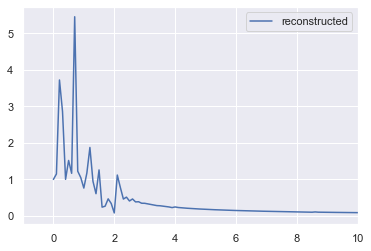

input frequency = 9.052631578947368 Hz


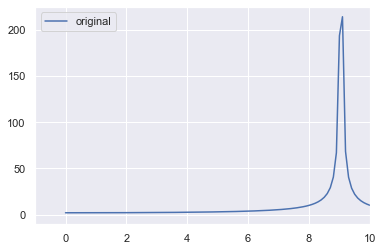

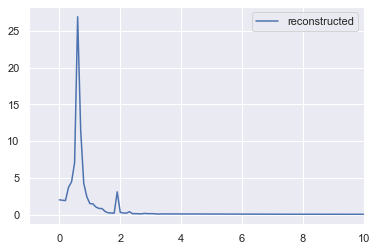

input frequency = 9.526315789473683 Hz


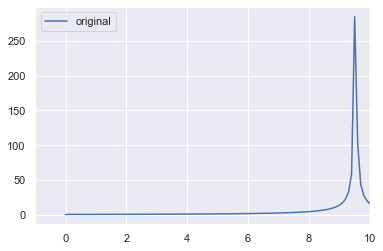

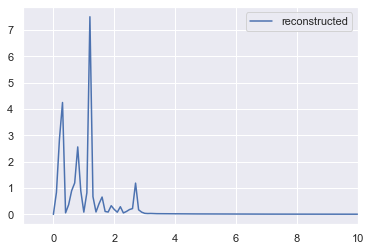

input frequency = 10.0 Hz


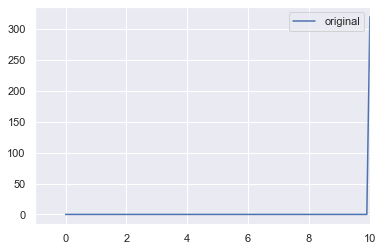

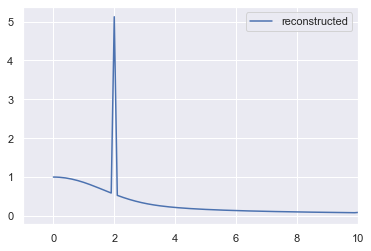

In [50]:
fs = 64 # hz
duration = 10 # s
signal_freqs = np.linspace(1, 10, 20)
threshold = 0.1
plot = True
mean_amplitudes = []
og_spectra = []
rec_spectra = []

for signal_freq in signal_freqs:
    signal = np.sin(np.arange(0, duration, 1 / fs) * signal_freq * 2 * np.pi)
    N = len(signal)

    up_spikes, down_spikes = ADM(
        signal,
        up_threshold=threshold,
        down_threshold=threshold,
        sampling_rate=fs,
        refractory_period=0
    )
    
    reconstructed_signal = (
        reconstruct_from_spikes(up_spikes, len(signal), 1) +
        reconstruct_from_spikes(down_spikes, len(signal), -1)
    )
    
    og_spectrum = abs(fft(signal)[:N//2])
    rec_spectrum = abs(fft(reconstructed_signal)[:N//2])
    freqs = fftfreq(N, 1 / fs)[:N//2]
    rec_spectra.append(rec_spectrum)
    og_spectra.append(og_spectrum)
    
    if plot:
        print('input frequency = {} Hz'.format(signal_freq))
        plt.plot(freqs, og_spectrum, label='original')
        plt.xlim(-1, 10)
        plt.legend()
        plt.show()
        plt.plot(freqs, rec_spectrum, label='reconstructed')
        plt.xlim(-1, 10)
        plt.legend()
        plt.show()
        #plt.plot(freqs, rec_spectrum / og_spectrum, label='transfer function')
        #plt.xlim(-1, 10)
    
    

    mean_amplitudes.append(np.mean(abs(reconstructed_signal)))

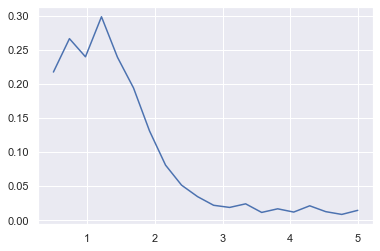

In [40]:
plt.plot(signal_freqs, mean_amplitudes)

(-1.0, 10.0)

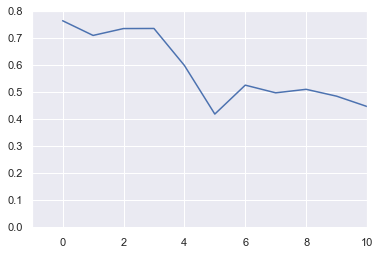

In [43]:
plt.plot(loop_inplace_sum(rec_spectra) / loop_inplace_sum(og_spectra))
plt.xlim(-1, 10)

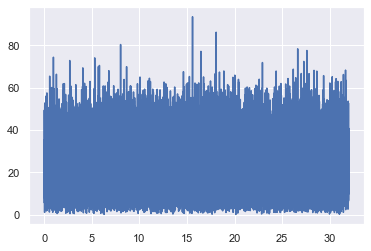

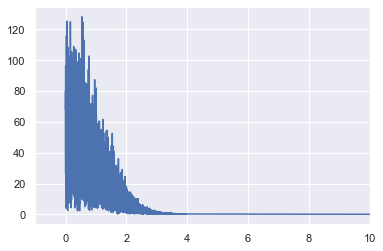

(-0.1, 4.0)

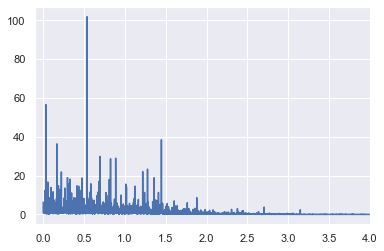

In [47]:
duration = 1000
signal = np.random.normal(0, 0.1, size=duration * fs)
N = len(signal)

up_spikes, down_spikes = ADM(
    signal,
    up_threshold=threshold,
    down_threshold=threshold,
    sampling_rate=fs,
    refractory_period=0
)

reconstructed_signal = (
    reconstruct_from_spikes(up_spikes, len(signal), 1) +
    reconstruct_from_spikes(down_spikes, len(signal), -1)
)

og_intensities = abs(fft(signal)[:N//2])
rec_intensities = abs(fft(reconstructed_signal)[:N//2])
freqs = fftfreq(N, 1 / fs)[:N//2]

plt.plot(freqs, og_intensities, label='original')
plt.show()
plt.plot(freqs, rec_intensities, label='reconstructed')
plt.xlim(-1, 10)
plt.show()
plt.plot(freqs, rec_intensities / og_intensities, label='transfer function')
plt.xlim(-0.1, 4)